In [136]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from PIL import ImageFilter

class CenterErasing(object):
    def __init__(self, length):
        self.length = length

    def __call__(self, img):
        h, w = img.size(1), img.size(2)
        y1 = (h - self.length) // 2
        y2 = (h + self.length) // 2
        x1 = (w - self.length) // 2
        x2 = (w + self.length) // 2

        img[:, y1:y2, x1:x2] = 0
        return img
    
def visualize(method=None):
    # CIFAR-10 클래스 이름
    labels_map = {
        0: "Airplane",
        1: "Automobile",
        2: "Bird",
        3: "Cat",
        4: "Deer",
        5: "Dog",
        6: "Frog",
        7: "Horse",
        8: "Ship",
        9: "Truck",
    }
    _transforms = None
    if (method == None):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'crop'):
        _transforms = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'flip'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'color_jitter'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.ColorJitter(0.8, 0.8, 0.8, 0.2),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'grayscale'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.Grayscale(num_output_channels=3),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'translation'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomAffine(0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'shearing'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomAffine(degrees=0, shear=10),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'rotation'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.RandomRotation(degrees=180),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
    elif (method == 'cutout'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            CenterErasing(length=56),            
        ])
    elif (method == 'noise_injection'):
        _transforms = transforms.Compose([
            transforms.Resize(224),            
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            transforms.Lambda(lambda img: img + 0.1 * torch.randn_like(img)),
        ])
    elif (method == 'kernel_filtering'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            transforms.GaussianBlur(kernel_size=(5, 9), sigma=(9, 11)),
        ])
    elif (method == 'random_erasing'):
        _transforms = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            transforms.RandomErasing(p=1.0, scale=(0.02, 0.1), ratio=(0.3, 3.3), value='random'),
        ])

    # 데이터셋 로드
    train_dataset = datasets.CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=_transforms
    )

    # 데이터 로더 생성
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)

    # 데이터 로더에서 배치 하나 가져오기
    images, labels = next(iter(train_loader))

    # 이미지를 보여주기 위해 정규화를 되돌림
    def imshow(img):
        img = img / 2 + 0.5  # 정규화 되돌림
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

    # 이미지와 레이블 출력
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    for idx in range(4):
        img = images[idx] / 2 + 0.5  # 정규화 되돌림
        npimg = img.numpy()
        ax = axes[idx]
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.set_title(labels_map[labels[idx].item()])
        ax.axis('off')

    plt.show()

Files already downloaded and verified


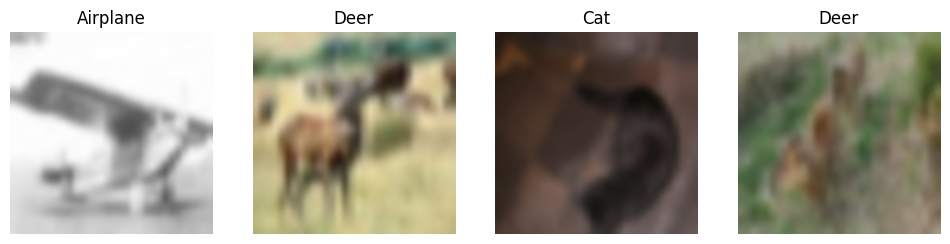

In [140]:
visualize('kernel_filtering')